Discrete Fourier Transform (DFT) (1-3) and Inverse Discrete Fourier Transform (IDFT) (4)


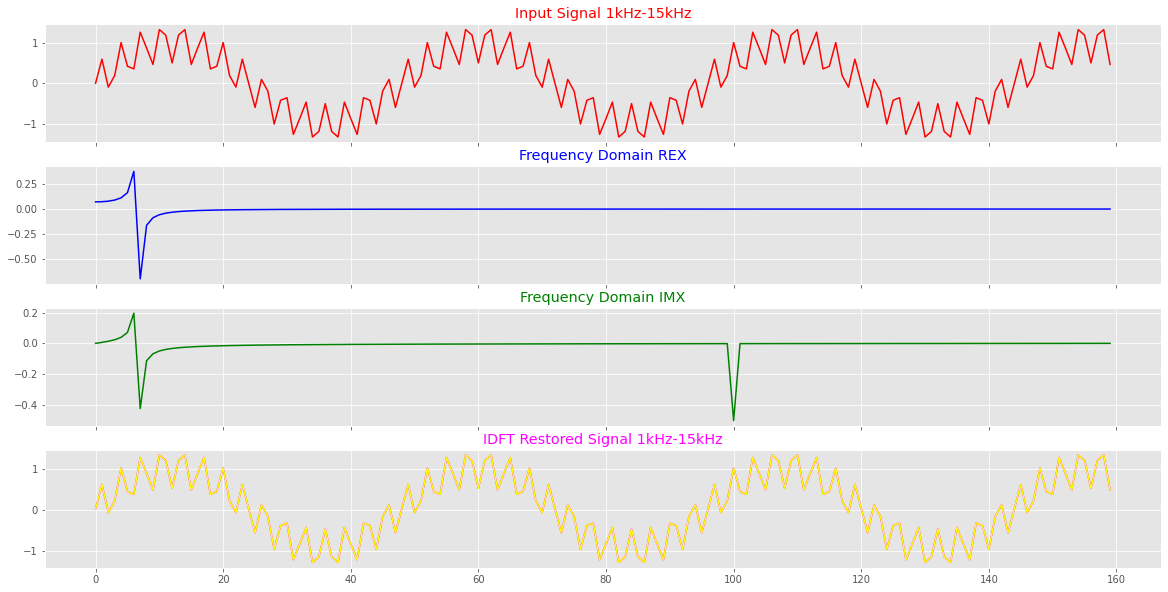

Frequency Domain Magnitude


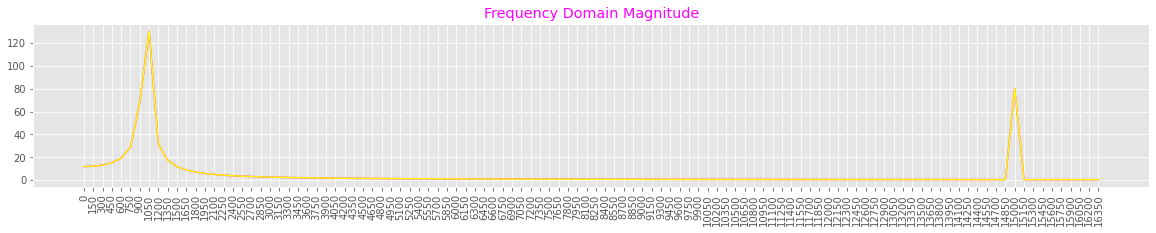

In [8]:
import mysignals as sigs
from matplotlib import pyplot as plt
from matplotlib import style
import math
import cmath
import matplotlib.ticker as mticker

###PROPERTY SECTION###
sample_rate = 48000
input_signal = sigs.InputSignal_1kHz_15kHz
N = len(input_signal)

sig_dest_rex_arr = [None]*int(N/2)
sig_dest_imx_arr = [None]*int(N/2)
sig_dest_mag_arr_t = [None]*int(N/2)
sig_dest_mag_arr_e = [None]*int(N/2)
for x in range(int(N/2)):
  sig_dest_rex_arr[x]=0
  sig_dest_imx_arr[x]=0
  sig_dest_mag_arr_t[x]=0
  sig_dest_mag_arr_e[x]=0
sig_dest_idft_arr_t = [None]*N
sig_dest_idft_arr_e = [None]*N
for x in range(N):
  sig_dest_idft_arr_t[x]=0
  sig_dest_idft_arr_e[x]=0


###ALGORITHM SECTION###
def get_frequences_arr(sig_dest_mag_arr, sample_rate):
  frequences = [None]*len(sig_dest_mag_arr)
  for x in range(len(sig_dest_mag_arr)):
    frequences[x] = x * int(sample_rate/N)
  return frequences

def calc_dft_t(sig_src_arr, sig_dest_rex_arr, sig_dest_imx_arr, sig_dest_mag_arr):
  N = len(sig_src_arr);
  for k in range(int(N/2)):
    for i in range(N):
      sig_dest_rex_arr[k] = sig_dest_rex_arr[k] + sig_src_arr[i]*math.cos(2*math.pi*k*i/N)
      sig_dest_imx_arr[k] = sig_dest_imx_arr[k] - sig_src_arr[i]*math.sin(2*math.pi*k*i/N)
  for x in range(int(N/2)):
    sig_dest_mag_arr[x] = math.sqrt(math.pow(sig_dest_rex_arr[x],2) + math.pow(sig_dest_imx_arr[x],2))

def calc_dft_e(sig_src_arr, sig_dest_mag_arr):
  N = len(sig_src_arr);
  sig_dest_complex_arr = [complex(0,0)]*int(N/2)
  for w in range(int(N/2)):
    for t in range(N):
      e = math.e**(-2 * math.pi * 1j * w * t/N)
      sig_dest_complex_arr[w] = sig_dest_complex_arr[w] + sig_src_arr[t] * e
    sig_dest_mag_arr[w]=math.sqrt(sig_dest_complex_arr[w].real**2 + sig_dest_complex_arr[w].imag**2)
    
def calc_idtf_t(sig_src_rex_arr, sig_src_imx_arr, sig_dest_idft_arr):
  N = len(sig_src_rex_arr)
  for x in range(N):
    sig_src_rex_arr[x] = sig_src_rex_arr[x] / N
    sig_src_imx_arr[x] = sig_src_imx_arr[x] / N
  for k in range(N):
    for i in range(N*2):
      sig_dest_idft_arr[i] = sig_dest_idft_arr[i] + sig_src_rex_arr[k] * math.cos(2 * math.pi * k * i/(N*2))
      sig_dest_idft_arr[i] = sig_dest_idft_arr[i] - sig_src_imx_arr[k] * math.sin(2 * math.pi * k * i/(N*2))

  sig_dest_idft_arr = sig_dest_idft_arr[::-1]

def calc_idtf_e(sig_src_rex_arr, sig_src_imx_arr, sig_dest_idft_arr):
  N = len(sig_src_rex_arr)
  for k in range(N):
    for i in range(0, N*2):
      e = math.e**(2 * math.pi * 1j * k * i/(N*2))
      w = complex(sig_src_rex_arr[k], sig_src_imx_arr[k]) * e
      sig_dest_idft_arr[i] = sig_dest_idft_arr[i] + w.real
      #ignore Imag part. it contains the same data but with the shift
      #sig_dest_idft_arr[i] = sig_dest_idft_arr[i] + w.imag


###ACTION SECTION###
calc_dft_t(input_signal, sig_dest_rex_arr, sig_dest_imx_arr, sig_dest_mag_arr_t)
calc_dft_e(input_signal, sig_dest_mag_arr_e)
calc_idtf_t(sig_dest_rex_arr, sig_dest_imx_arr, sig_dest_idft_arr_t)
calc_idtf_e(sig_dest_rex_arr, sig_dest_imx_arr, sig_dest_idft_arr_e)

###PLOT SECTION###
style.use('ggplot')

print('Discrete Fourier Transform (DFT) (1-3) and Inverse Discrete Fourier Transform (IDFT) (4)')
plt.rcParams["figure.figsize"] = (20,10)
f,plt_arr = plt.subplots(4, sharex=True)
plt_arr[0].plot(input_signal[:160], color='red')
plt_arr[0].set_title("Input Signal 1kHz-15kHz", color='red')
plt_arr[1].plot(sig_dest_rex_arr, color='blue')
plt_arr[1].set_title("Frequency Domain REX", color='blue')
plt_arr[2].plot(sig_dest_imx_arr, color='green')
plt_arr[2].set_title("Frequency Domain IMX", color='green')
plt_arr[3].plot(sig_dest_idft_arr_t[:160], color='magenta')
plt_arr[3].plot(sig_dest_idft_arr_e[:160], color='yellow')
plt_arr[3].set_title("IDFT Restored Signal 1kHz-15kHz", color='magenta')
plt.show()

print('Frequency Domain Magnitude')
plt.rcParams["figure.figsize"] = (20,3)
frequences_x = get_frequences_arr(sig_dest_mag_arr_t, sample_rate)
plt.xticks(range(int(N/2))[:110], frequences_x[:110], rotation=90)
plt.title("Frequency Domain Magnitude", color='magenta')
plt.plot(sig_dest_mag_arr_t[:110], color='magenta')
plt.plot(sig_dest_mag_arr_e[:110], color='yellow')
plt.show()
